# <span style="color:rgb(255, 0, 255)">This document contains the different tries we made</span> 

Here we only have the code related to machine learning model tries. If you want to review all the steps we took please review the final notebook.

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Function we use for modeling results</span>


In [2]:
def modeling(y, X, models=[], test_size=0.25):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", r2), print("R2 adjusted =", r2_adj), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [3]:
data = pd.read_excel('regression_data.xls')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.shape

(21597, 21)

### <span style="color:rgb(255, 0, 255)">--- Drop columns that we don't longer need

In [5]:
df = data.copy() # for that we are using df as a table to do all the changes
df = df.drop(['id'], axis=1)
df.head() #we don't need "id" for the model because is an ID

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### <span style="color:rgb(255, 0, 255)"> Create a column for year, month, heck for the format of date columns</span>

<span style="color:rgb(255, 0, 255)"> Create columns for year, month, day so we can use this info for the model:

In [6]:
df['day_bought']=data['date'].dt.day
df['month_bought']=data['date'].dt.month
df['year_bought']=data['date'].dt.year

In [7]:
df = df.drop('date', axis=1) #let's drop date because we already have that info in the new columns created

df.to_csv('df.csv', index=False) # this is the point where we will start the following tries

<span style="color:rgb(255, 0, 255)">**continous** = sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price (target), month_bought, year_bought
    
<span style="color:rgb(255, 0, 255)">**discrete** = bedrooms, bathrooms, floors, waterfront, view, condition, grade

# First try without doing much to the dataset

#### We have an original R2 of 0,692

In [8]:
X_num = df.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(21597, 21)

In [9]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6927167253231534
R2 adjusted = 0.7012699305815842
RMSE = 197711.7
MSE = 39089916733.08
MAE = 125329.52
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7106614073885723
R2 adjusted = 0.7615972414172589
RMSE = 191851.9
MSE = 36807149704.91
MAE = 101284.39
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7838658208228286
R2 adjusted = 0.882604752548026
RMSE = 165815.31
MSE = 27494718272.88
MAE = 90764.19
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8551121298468471
R2 adjusted = 0.9176023760599616
RMSE = 135762.22
MSE = 18431379924.19
MAE = 75852.07


# ❌Removing outliers I 

#### Removing outliers of so many columns (sqft_living, sqft_lot, sqft_basement, sqft_above, sqft_living15, sqft_lot15, affected badly the R2

In [11]:
df1 = pd.read_csv('df.csv')
df1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day_bought,month_bought,year_bought
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,13,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,9,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,25,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,9,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,18,2,2015


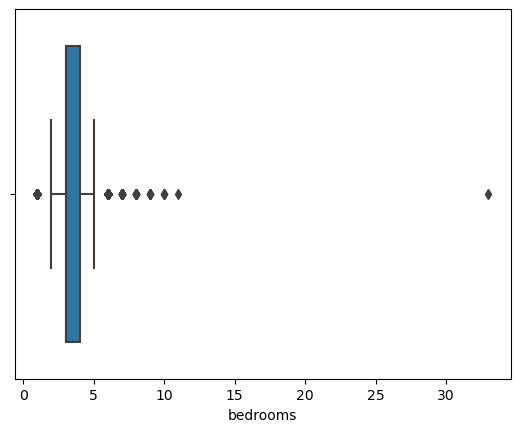

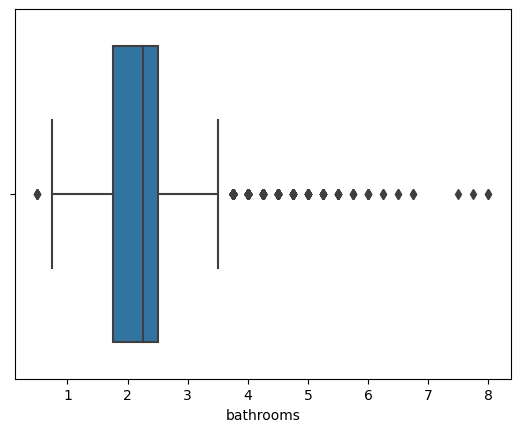

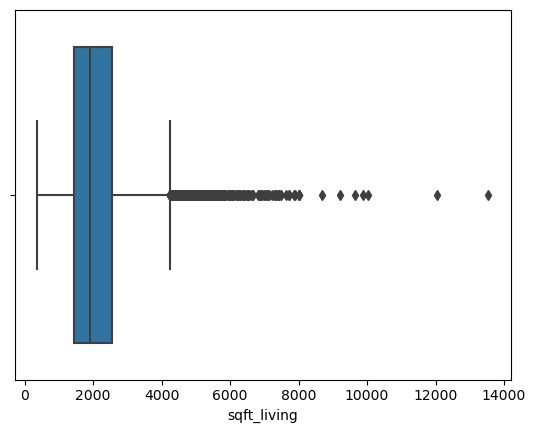

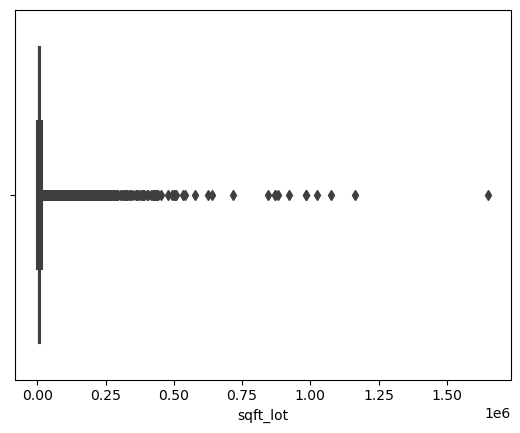

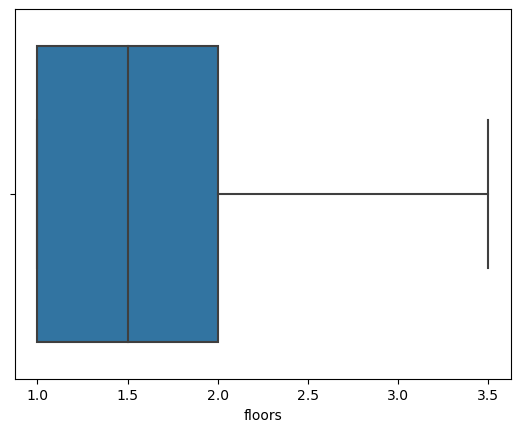

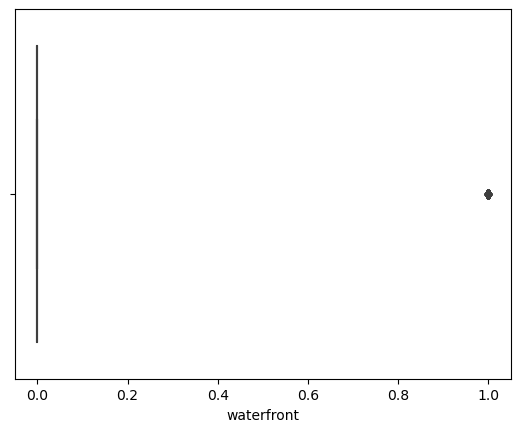

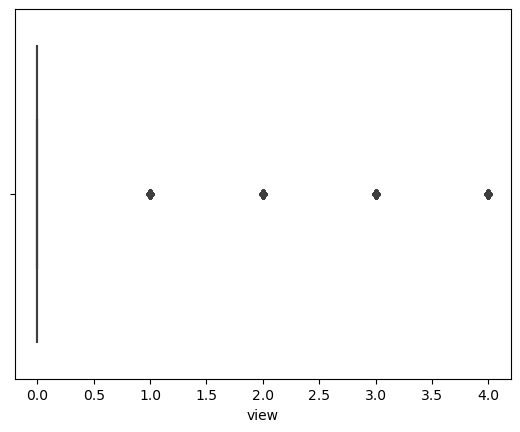

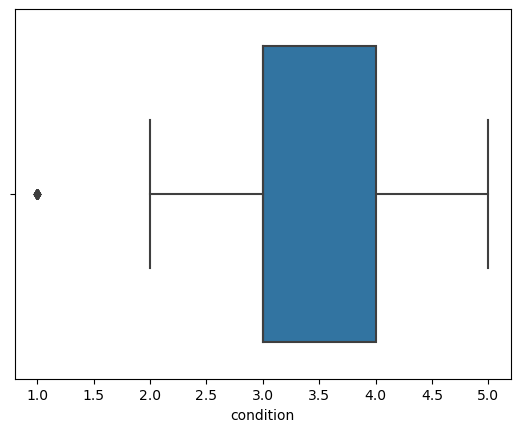

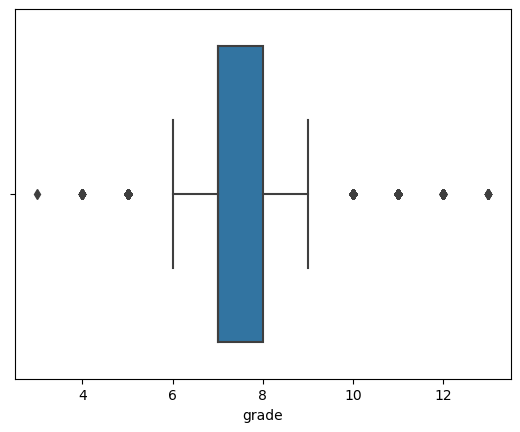

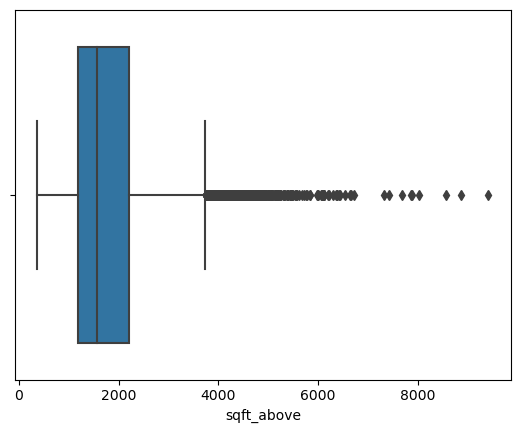

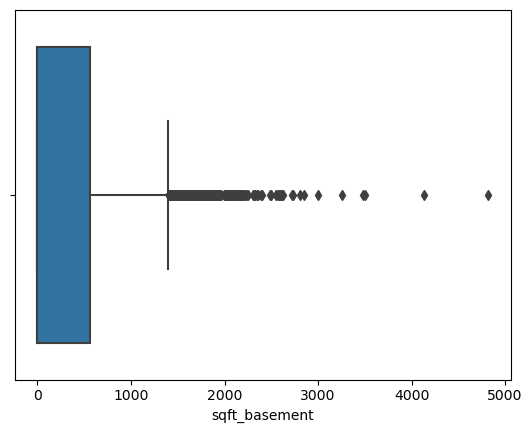

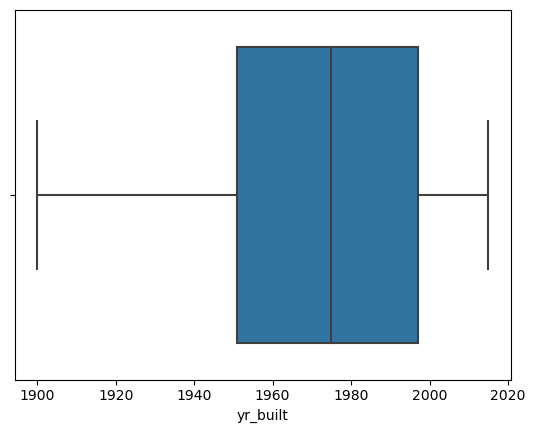

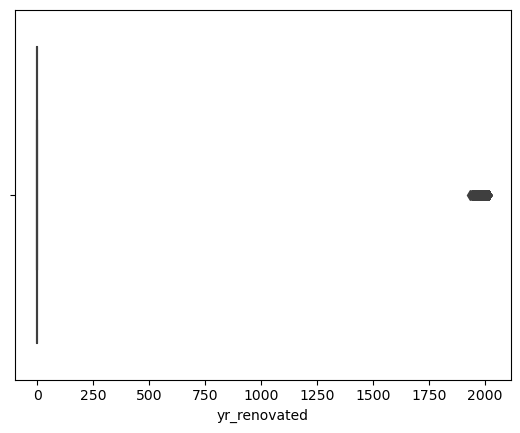

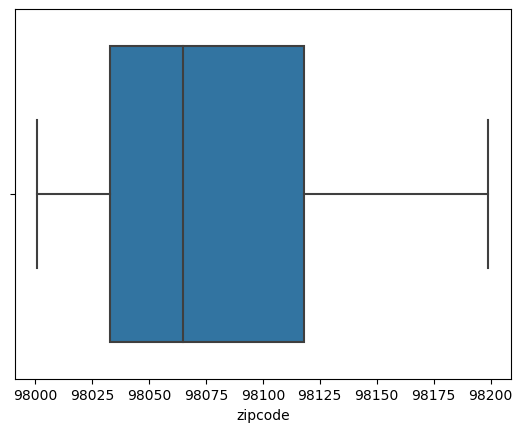

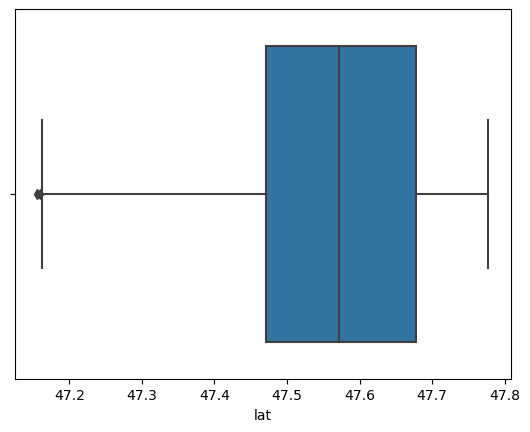

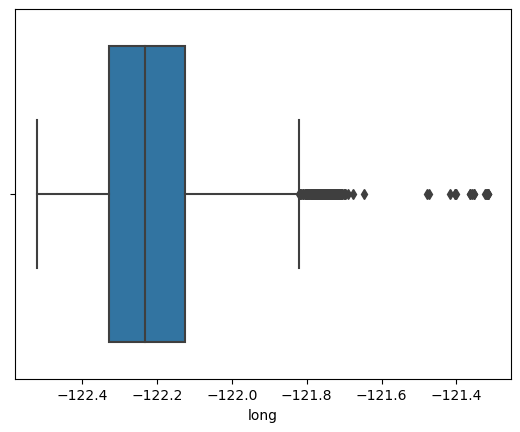

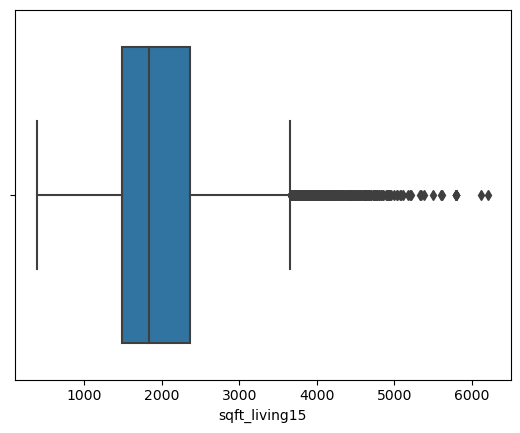

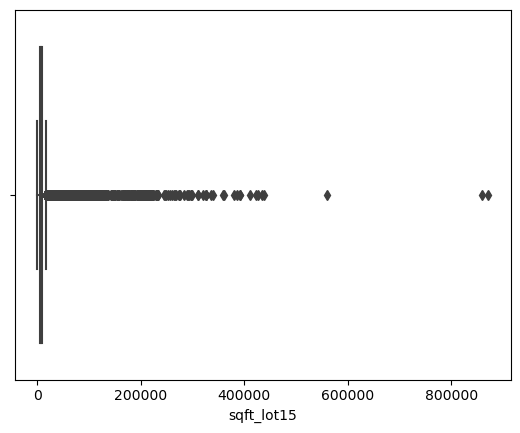

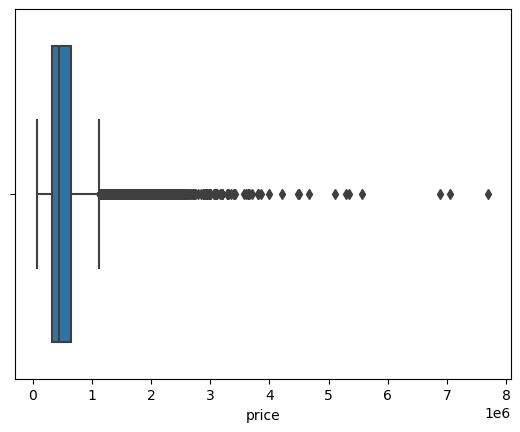

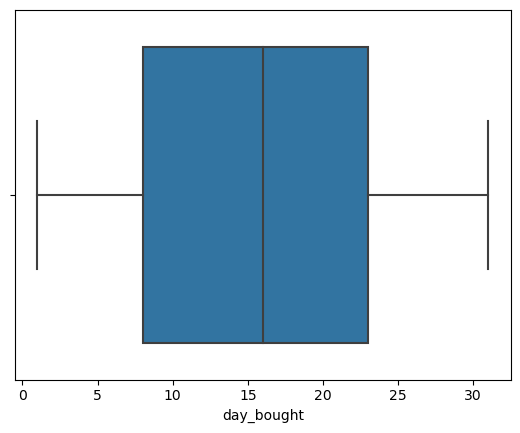

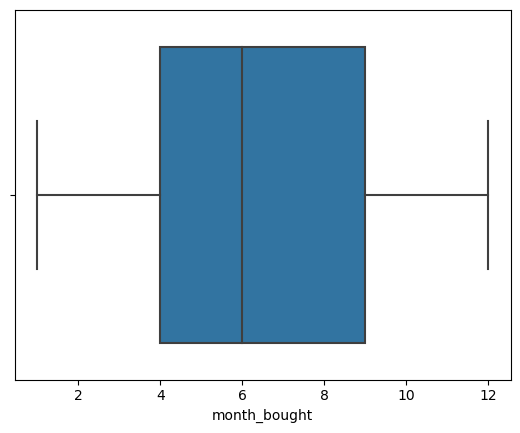

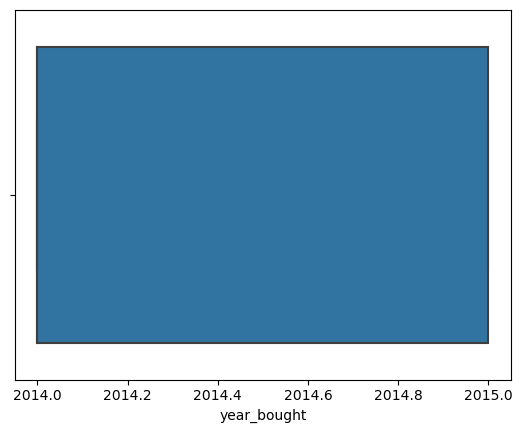

In [12]:
#Create a group of boxplots

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(x=df[col] ,whis=1.5)

In [13]:
#Remove outliers sqft_living
iqr = np.percentile(df1['sqft_living'],75) - np.percentile(df1['sqft_living'],25)
upper_limit = np.percentile(df1['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_living'],25) - 1.5*iqr
df1 = df1[(df1['sqft_living']>lower_limit) & (df1['sqft_living']<upper_limit)]
df1.shape

(21015, 22)

In [14]:
#Remove outliers sqft_lot
iqr = np.percentile(df1['sqft_lot'],75) - np.percentile(df1['sqft_lot'],25)
upper_limit = np.percentile(df1['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_lot'],25) - 1.5*iqr
df1 = df1[(df1['sqft_lot']>lower_limit) & (df1['sqft_lot']<upper_limit)]
df1.shape

(18766, 22)

In [15]:
#Remove outliers sqft_basement
iqr = np.percentile(df1['sqft_basement'],75) - np.percentile(df1['sqft_basement'],25)
upper_limit = np.percentile(df1['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_basement'],25) - 1.5*iqr
df1 = df1[(df1['sqft_basement']>lower_limit) & (df1['sqft_basement']<upper_limit)]
df1.shape

(18417, 22)

In [16]:
#Remove outliers sqft_above
iqr = np.percentile(df1['sqft_above'],75) - np.percentile(df1['sqft_above'],25)
upper_limit = np.percentile(df1['sqft_above'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_above'],25) - 1.5*iqr
df1 = df1[(df1['sqft_above']>lower_limit) & (df1['sqft_above']<upper_limit)]
df1.shape

(17977, 22)

In [17]:
#Remove outliers sqft_living15
iqr = np.percentile(df1['sqft_living15'],75) - np.percentile(df1['sqft_living15'],25)
upper_limit = np.percentile(df1['sqft_living15'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_living15'],25) - 1.5*iqr
df1 = df1[(df1['sqft_living15']>lower_limit) & (df1['sqft_living15']<upper_limit)]
df1.shape

(17690, 22)

In [18]:
#Remove outliers sqft_lot15
iqr = np.percentile(df1['sqft_lot15'],75) - np.percentile(df1['sqft_lot15'],25)
upper_limit = np.percentile(df1['sqft_lot15'],75) + 1.5*iqr
lower_limit = np.percentile(df1['sqft_lot15'],25) - 1.5*iqr
df1 = df1[(df1['sqft_lot15']>lower_limit) & (df1['sqft_lot15']<upper_limit)]
df1.shape

(17243, 22)

In [19]:
X_num = df1.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(17243, 21)

In [20]:
X = X_num_normalized.copy()
Y = df1["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6699282195028298
R2 adjusted = 0.676876164611619
RMSE = 132635.29
MSE = 17592120678.84
MAE = 94690.27
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7274757381515334
R2 adjusted = 0.7600754182883132
RMSE = 120519.55
MSE = 14524960889.2
MAE = 78825.59
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7743436521801028
R2 adjusted = 0.8554431777006601
RMSE = 109667.69
MSE = 12027001208.08
MAE = 70396.15
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8398672672741376
R2 adjusted = 0.8954001740748347
RMSE = 92383.62
MSE = 8534732519.4
MAE = 58985.6


# ❌Removing outliers II

#### Removing outliers of sqft_living (0.683), sqft_living + sqft_lot (0.694), sqft_living + sqft_lot + sqft_basement (0.683)

In [22]:
df2 = pd.read_csv('df.csv')
df2.shape

(21597, 22)

In [23]:
#Remove outliers sqft_living
iqr = np.percentile(df2['sqft_living'],75) - np.percentile(df2['sqft_living'],25)
upper_limit = np.percentile(df2['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(df2['sqft_living'],25) - 1.5*iqr
df2 = df2[(df['sqft_living']>lower_limit) & (df2['sqft_living']<upper_limit)]
df2.shape

(21015, 22)

In [24]:
#Remove outliers sqft_lot
iqr = np.percentile(df2['sqft_lot'],75) - np.percentile(df2['sqft_lot'],25)
upper_limit = np.percentile(df2['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df2['sqft_lot'],25) - 1.5*iqr
df2 = df2[(df2['sqft_lot']>lower_limit) & (df2['sqft_lot']<upper_limit)]
df2.shape

(18766, 22)

In [25]:
#Remove outliers sqft_basement
iqr = np.percentile(df2['sqft_basement'],75) - np.percentile(df2['sqft_basement'],25)
upper_limit = np.percentile(df2['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(df2['sqft_basement'],25) - 1.5*iqr
df2 = df2[(df2['sqft_basement']>lower_limit) & (df2['sqft_basement']<upper_limit)]
df2.shape

(18417, 22)

In [26]:
X_num = df2.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18417, 21)

In [27]:
X = X_num_normalized.copy()
Y = df2["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.68359138982968
R2 adjusted = 0.6868568458606081
RMSE = 151420.74
MSE = 22928240070.0
MAE = 101229.53
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7156699389462395
R2 adjusted = 0.756756214534485
RMSE = 143539.89
MSE = 20603699423.5
MAE = 85613.48
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7521978278075498
R2 adjusted = 0.8583641693327646
RMSE = 134002.77
MSE = 17956741729.74
MAE = 77043.47
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8458711563004288
R2 adjusted = 0.9012398236126413
RMSE = 105682.52
MSE = 11168795716.88
MAE = 62316.42


# 🆙Removing outliers III: sqft_lot

In [29]:
df3 = pd.read_csv('df.csv')
df3.shape

(21597, 22)

In [30]:
#Remove outliers sqft_lot
iqr = np.percentile(df3['sqft_lot'],75) - np.percentile(df3['sqft_lot'],25)
upper_limit = np.percentile(df3['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df3['sqft_lot'],25) - 1.5*iqr
df3 = df3[(df3['sqft_lot']>lower_limit) & (df3['sqft_lot']<upper_limit)]
df3.shape

(19178, 22)

In [31]:
X_num = df3.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(19178, 21)

In [32]:
X = X_num_normalized.copy()
Y = df3["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7036939165875892
R2 adjusted = 0.7085878430949082
RMSE = 176687.18
MSE = 31218359928.89
MAE = 114862.01
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7343509094267462
R2 adjusted = 0.7803624117201521
RMSE = 167297.3
MSE = 27988385620.68
MAE = 93474.64
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.755385572941944
R2 adjusted = 0.8761472743785407
RMSE = 160537.24
MSE = 25772205348.44
MAE = 86898.72
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8461649973052946
R2 adjusted = 0.9120260503203981
RMSE = 127309.95
MSE = 16207822763.8
MAE = 72295.2


# ❌ Removing outliers IV: "long"

In [34]:
df4 = pd.read_csv('df.csv')
df4.shape

(21597, 22)

In [35]:
#Remove outliers sqft_lot
iqr = np.percentile(df4['long'],75) - np.percentile(df4['long'],25)
upper_limit = np.percentile(df4['long'],75) + 1.5*iqr
lower_limit = np.percentile(df4['long'],25) - 1.5*iqr
df4 = df4[(df4['long']>lower_limit) & (df4['long']<upper_limit)]
df4.shape

(21342, 22)

In [36]:
X_num = df4.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(21342, 21)

In [37]:
X = X_num_normalized.copy()
Y = df4["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6798136312154377
R2 adjusted = 0.702164571868093
RMSE = 207507.99
MSE = 43059565530.75
MAE = 128260.37
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7121142678300036
R2 adjusted = 0.7676885753110676
RMSE = 196763.02
MSE = 38715684858.16
MAE = 101617.82
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7637645036878917
R2 adjusted = 0.8822128088685735
RMSE = 178240.33
MSE = 31769615529.71
MAE = 91771.67
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.860127998221487
R2 adjusted = 0.9180384416146553
RMSE = 137150.94
MSE = 18810381120.73
MAE = 75620.63


# ❌ Removing outliers V: "sqft_above"

In [39]:
df5 = pd.read_csv('df.csv')
df5.shape

(21597, 22)

In [40]:
#Remove outliers sqft_lot
iqr = np.percentile(df5['sqft_above'],75) - np.percentile(df5['sqft_above'],25)
upper_limit = np.percentile(df5['sqft_above'],75) + 1.5*iqr
lower_limit = np.percentile(df5['sqft_above'],25) - 1.5*iqr
df5 = df5[(df5['sqft_above']>lower_limit) & (df5['sqft_above']<upper_limit)]
df5.shape

(20979, 22)

In [41]:
X_num = df5.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(20979, 21)

In [42]:
X = X_num_normalized.copy()
Y = df5["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6895683250533602
R2 adjusted = 0.6877072540393725
RMSE = 167424.89
MSE = 28031094082.0
MAE = 110865.38
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7291967808967044
R2 adjusted = 0.7735998400951255
RMSE = 156373.78
MSE = 24452757643.69
MAE = 90834.81
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7686143263467645
R2 adjusted = 0.8627348139875252
RMSE = 144545.72
MSE = 20893465811.81
MAE = 84605.66
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8502487929290976
R2 adjusted = 0.9019789813953669
RMSE = 116284.59
MSE = 13522106515.13
MAE = 70054.56


# 🆙🟩Removing outliers VI: sqft_lot + sqft_lot15

In [44]:
df6 = pd.read_csv('df.csv')
df6.shape

(21597, 22)

In [45]:
#Remove outliers sqft_lot
iqr = np.percentile(df6['sqft_lot'],75) - np.percentile(df6['sqft_lot'],25)
upper_limit = np.percentile(df6['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df6['sqft_lot'],25) - 1.5*iqr
df6 = df6[(df6['sqft_lot']>lower_limit) & (df6['sqft_lot']<upper_limit)]
df6.shape

(19178, 22)

In [46]:
#Remove outliers sqft_lot15
iqr = np.percentile(df6['sqft_lot15'],75) - np.percentile(df6['sqft_lot15'],25)
upper_limit = np.percentile(df6['sqft_lot15'],75) + 1.5*iqr
lower_limit = np.percentile(df6['sqft_lot15'],25) - 1.5*iqr
df6 = df6[(df6['sqft_lot15']>lower_limit) & (df6['sqft_lot15']<upper_limit)]
df6.shape

(18623, 22)

In [47]:
df6.to_csv('df1_outliers_best.csv', index=False) # this is the point where we will start the following tries

In [48]:
X_num = df6.drop("price", axis = 1)
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 21)

In [49]:
X = X_num_normalized.copy()
Y = df6["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [50]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7153152668879232
R2 adjusted = 0.7107635819794387
RMSE = 157957.35
MSE = 24950525113.61
MAE = 106799.61
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7531940964192356
R2 adjusted = 0.7820519566854709
RMSE = 147073.87
MSE = 21630724022.9
MAE = 87211.43
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7915757018238125
R2 adjusted = 0.8892768502057569
RMSE = 135154.94
MSE = 18266858321.08
MAE = 78279.7
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8741329383369391
R2 adjusted = 0.9182855686839216
RMSE = 105030.11
MSE = 11031323136.55
MAE = 64531.59


# With feature engineering


In [ ]:
df["yr_diff_renovated"] = df["yr_renovated"] - df["yr_built"]
df["yr_diff_bought"] = df["year_bought"] - df["yr_built"]

In [ ]:
df["sqrt_diff"] = df["sqft_lot"] - df["sqft_living"]
df["sqrt_diff_15"] = df["sqft_lot15"] - df["sqft_living15"]

In [ ]:
df["yr_diff_renovated"]= df["yr_diff_renovated"].apply(lambda x: x if x>0 else 0)
df["yr_renovated_binary"] = df["yr_diff_renovated"].apply(lambda x: 1 if x>0 else 0)
df["basement_binary"] = df["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

### <span style="color:rgb(255, 0, 255)">--- Transforming Skewed data with log transformation

In [ ]:
# sqft_living, sqft_above, sqft_living15
df["sqft_living_log"] = np.log((df.sqft_living))
df["sqft_above_log"] = np.log((df.sqft_above))
df["sqft_living15_log"] = np.log((df.sqft_living15))


In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living, bins=50, color='blue')
plt.title('Histogram of sqft_living')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living_log, bins=50, color='green')
plt.title('Histogram of sqft_living_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above, bins=50, color='blue')
plt.title('Histogram of sqft_above')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above_log, bins=50, color='green')
plt.title('Histogram of sqft_above_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15, bins=50, color='blue')
plt.title('Histogram of sqft_living15')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15_log, bins=50, color='green')
plt.title('Histogram of sqft_living15_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# let's study the correlation again with new columns
corr = df.corr()

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Crear un mapa de calor
plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

# Mostrar el mapa de calor
plt.show()

<span style="color:rgb(255, 0, 255)"> sqft_living_log is highly correlated with sqft_living (obviously), bedrooms, bathrooms, sqft_above, sqft_living15, sqft_living15_log, grade

### <span style="color:rgb(255, 0, 255)">--- Load the continuous and discrete variables into numericals and categorical variables</span>

In [ ]:
# Let's update this split
num_cont = df[["sqft_living_log", "sqft_lot", "sqft_basement", "sqft_lot15", "zipcode", "yr_built", "yr_renovated", "year_bought", "month_bought", "day_bought", "yr_diff_renovated", "yr_diff_bought", "sqrt_diff", "sqrt_diff_15"]]
num_dis = df[["bedrooms", "floors", "waterfront", "view", "condition", "yr_renovated_binary"]]
target = df['price']
X_num = df.copy()
X_num = X_num.drop(columns=['price', "sqft_living", "sqft_basement"], axis=1)
X_num.head()

In [ ]:
num_cont.shape

In [ ]:
num_dis.shape

In [ ]:
target.shape

In [ ]:
X_num.shape

### <span style="color:rgb(255, 0, 255)">--- Scaling

In [ ]:
X_num.columns

In [ ]:
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

### <span style="color:rgb(255, 0, 255)">--- Try test split


In [ ]:
X = X_num_normalized.copy()
Y = target
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
#Test model
predictions = model.predict(X_test)
predictions.shape

In [ ]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

### <span style="color:rgb(255, 0, 255)">--- Trying different models


In [ ]:
def modeling(y, X, models=[], test_size=0.25):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

In [ ]:
# Coefficient values

reg = LinearRegression()
reg.fit(X_train, y_train)

# Get the coefficients and feature names
coef = reg.coef_
feature_names = df.columns

# Print the coefficients and feature names
for feature, coef in zip(feature_names, coef):
    print(f"{feature}: {coef:.2f}")
    
# high negative of positive coef: bedrooms,sqft_living, sqft_lot, floors, waterfront, view, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, sqft_lot15, day_bought, year_bought, yr_diff_renovated, yr_diff_bought, sqrt_diff, sqrt_diff_15, yr_renovated_binary     

In [ ]:
# Feature importance

from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importance scores
importances = rf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(df.columns, importances):
    print(f"{feature}: {importance:.2f}")

In [ ]:
data_650 = df.copy()
data_650 = df[df['price'] > 650000]
data_650.shape


In [ ]:
data_650.to_csv('table_SQL.csv', index=False)

### <span style="color:rgb(255, 0, 255)">--- Run the model based on feature importance


In [ ]:
# let's dive in feature importance of linnear regression model


X_feature = X_num
y_feature = target

# create a linear regression object
reg = LinearRegression()

# fit the linear regression model on the data
reg.fit(X_feature, y_feature)

# print the coefficients and their corresponding feature names
coefficients = pd.DataFrame({'feature': X_feature.columns, 'coefficient': reg.coef_})
coefficients = coefficients.sort_values('coefficient', ascending=False)
print(coefficients)


In [ ]:
#selecting values:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(reg, threshold=0.5*reg.coef_.max())
selector.fit(X_feature, y_feature)

# print the selected feature names
selected_features = X_feature.columns[selector.get_support()]
print(selected_features)

In [ ]:
X_num1 = df[['waterfront', 'grade', 'lat', 'long', 'yr_renovated_binary','basement_binary', 'sqft_living_log', 'sqft_above_log','sqft_living15_log']]

In [ ]:
X_num1 = df[['waterfront', 'lat', 'yr_renovated_binary', 'sqft_living_log']]

In [ ]:
transformer = MinMaxScaler().fit(X_num1)
X_num_minmax = transformer.transform(X_num1)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num1.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

In [ ]:
X = X_num_normalized.copy()
Y = target
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
#Test model
predictions = model.predict(X_test)
predictions.shape

In [ ]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)